In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import time 
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

###### Read Train and Test Data. Test data is current season (2019) data which will be used for testing the model & making predictions. Train data is old season data (2014 to 2018) and will be used to build the model

In [2]:
df_train = pd.read_csv('Train_Team Complete Data.csv', sep = ',')
df_test = pd.read_csv('Test_Team Complete Data.csv', sep = ',')

In [3]:
df_train.head()

,Unnamed: 0,Season,Team,Matches Played,Total points scored,Total points conceded,Avg points scored,Successful raids,Raid points,Avg raid points,Successful tackles,Tackle points,Avg tackle points,Super raids,Super tackles,Do-or-Die raid points,All-outs inflicted,All-outs conceded
0,0,Season 1,Puneri Paltan,14,536,536,26.85,204,269,19.21,93,107,7.64,11,14,48,12,26
1,1,Season 1,Bengal Warriors,14,515,515,28.92,213,283,20.21,106,122,8.71,11,16,30,11,25
2,2,Season 1,Dabang Delhi K.C.,14,471,471,29.92,246,285,20.36,124,134,9.57,5,10,31,18,23
3,3,Season 1,U Mumba,16,499,499,31.50,270,347,21.69,145,157,9.81,12,12,40,21,19
4,4,Season 1,Patna Pirates,16,487,487,28.62,253,316,19.75,124,142,8.88,13,18,42,18,17


In [4]:
df_test.head()

,Unnamed: 0,Season,Team,Matches Played,Total points scored,Total points conceded,Avg points scored,Successful raids,Raid points,Avg raid points,Successful tackles,Tackle points,Avg tackle points,Super raids,Super tackles,Do-or-Die raid points,All-outs inflicted,All-outs conceded
0,0,Season 7,Puneri Paltan,18,578,620,28.83,254,308,17.11,189,211,11.72,6,22,60,17,27
1,1,Season 7,Tamil Thalaivas,18,525,609,26.00,248,313,17.39,144,155,8.61,4,13,51,13,26
2,2,Season 7,U.P. Yoddha,17,514,540,26.41,208,269,15.82,167,180,10.59,4,14,64,20,21
3,3,Season 7,Bengaluru Bulls,17,582,572,30.70,278,351,20.65,148,171,10.06,7,25,35,18,21
4,4,Season 7,Telugu Titans,16,474,532,27.06,228,270,16.88,143,163,10.19,5,21,35,9,20


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 18 columns):
Unnamed: 0               56 non-null int64
Season                   56 non-null object
Team                     56 non-null object
Matches Played           56 non-null int64
Total points scored      56 non-null int64
Total points conceded    56 non-null int64
Avg points scored        56 non-null float64
Successful raids         56 non-null int64
Raid points              56 non-null int64
Avg raid points          56 non-null float64
Successful tackles       56 non-null int64
Tackle points            56 non-null int64
Avg tackle points        56 non-null float64
Super raids              56 non-null int64
Super tackles            56 non-null int64
Do-or-Die raid points    56 non-null int64
All-outs inflicted       56 non-null int64
All-outs conceded        56 non-null int64
dtypes: float64(3), int64(13), object(2)
memory usage: 8.0+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
Unnamed: 0               12 non-null int64
Season                   12 non-null object
Team                     12 non-null object
Matches Played           12 non-null int64
Total points scored      12 non-null int64
Total points conceded    12 non-null int64
Avg points scored        12 non-null float64
Successful raids         12 non-null int64
Raid points              12 non-null int64
Avg raid points          12 non-null float64
Successful tackles       12 non-null int64
Tackle points            12 non-null int64
Avg tackle points        12 non-null float64
Super raids              12 non-null int64
Super tackles            12 non-null int64
Do-or-Die raid points    12 non-null int64
All-outs inflicted       12 non-null int64
All-outs conceded        12 non-null int64
dtypes: float64(3), int64(13), object(2)
memory usage: 1.8+ KB


### Proceed with Task 3: Predict the team with the highest points for successful raids (Raid Points)

###### Drop columns not required for this analysis: "Unnamed: 0", "Total points conceded", "Successful tackles", "Tackle points", "Avg tackle points", "Super tackles"from both train and test dataframes.

In [7]:
df_train.drop(columns = ["Unnamed: 0", "Total points conceded", "Successful tackles", "Tackle points", "Avg tackle points", "Super tackles", "All-outs conceded"], inplace = True)
df_test.drop(columns = ["Unnamed: 0", "Total points conceded", "Successful tackles", "Tackle points", "Avg tackle points", "Super tackles", "All-outs conceded"], inplace = True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
Season                   56 non-null object
Team                     56 non-null object
Matches Played           56 non-null int64
Total points scored      56 non-null int64
Avg points scored        56 non-null float64
Successful raids         56 non-null int64
Raid points              56 non-null int64
Avg raid points          56 non-null float64
Super raids              56 non-null int64
Do-or-Die raid points    56 non-null int64
All-outs inflicted       56 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 4.9+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
Season                   12 non-null object
Team                     12 non-null object
Matches Played           12 non-null int64
Total points scored      12 non-null int64
Avg points scored        12 non-null float64
Successful raids         12 non-null int64
Raid points              12 non-null int64
Avg raid points          12 non-null float64
Super raids              12 non-null int64
Do-or-Die raid points    12 non-null int64
All-outs inflicted       12 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.1+ KB


In [10]:
df_train.head()

,Season,Team,Matches Played,Total points scored,Avg points scored,Successful raids,Raid points,Avg raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,Season 1,Puneri Paltan,14,536,26.85,204,269,19.21,11,48,12
1,Season 1,Bengal Warriors,14,515,28.92,213,283,20.21,11,30,11
2,Season 1,Dabang Delhi K.C.,14,471,29.92,246,285,20.36,5,31,18
3,Season 1,U Mumba,16,499,31.50,270,347,21.69,12,40,21
4,Season 1,Patna Pirates,16,487,28.62,253,316,19.75,13,42,18


In [11]:
df_test.head()

,Season,Team,Matches Played,Total points scored,Avg points scored,Successful raids,Raid points,Avg raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,Season 7,Puneri Paltan,18,578,28.83,254,308,17.11,6,60,17
1,Season 7,Tamil Thalaivas,18,525,26.00,248,313,17.39,4,51,13
2,Season 7,U.P. Yoddha,17,514,26.41,208,269,15.82,4,64,20
3,Season 7,Bengaluru Bulls,17,582,30.70,278,351,20.65,7,35,18
4,Season 7,Telugu Titans,16,474,27.06,228,270,16.88,5,35,9


###### Drop the columns "Avg points scored", "Avg raid points" from both train and test dataframes as they are derived from existing data

In [12]:
df_train.drop(columns = ["Avg raid points", "Avg points scored"], inplace = True)
df_test.drop(columns = ["Avg raid points", "Avg points scored"], inplace = True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Season                   56 non-null object
Team                     56 non-null object
Matches Played           56 non-null int64
Total points scored      56 non-null int64
Successful raids         56 non-null int64
Raid points              56 non-null int64
Super raids              56 non-null int64
Do-or-Die raid points    56 non-null int64
All-outs inflicted       56 non-null int64
dtypes: int64(7), object(2)
memory usage: 4.0+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
Season                   12 non-null object
Team                     12 non-null object
Matches Played           12 non-null int64
Total points scored      12 non-null int64
Successful raids         12 non-null int64
Raid points              12 non-null int64
Super raids              12 non-null int64
Do-or-Die raid points    12 non-null int64
All-outs inflicted       12 non-null int64
dtypes: int64(7), object(2)
memory usage: 944.0+ bytes


In [15]:
df_train.head()

,Season,Team,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,Season 1,Puneri Paltan,14,536,204,269,11,48,12
1,Season 1,Bengal Warriors,14,515,213,283,11,30,11
2,Season 1,Dabang Delhi K.C.,14,471,246,285,5,31,18
3,Season 1,U Mumba,16,499,270,347,12,40,21
4,Season 1,Patna Pirates,16,487,253,316,13,42,18


In [16]:
df_test.head()

,Season,Team,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,Season 7,Puneri Paltan,18,578,254,308,6,60,17
1,Season 7,Tamil Thalaivas,18,525,248,313,4,51,13
2,Season 7,U.P. Yoddha,17,514,208,269,4,64,20
3,Season 7,Bengaluru Bulls,17,582,278,351,7,35,18
4,Season 7,Telugu Titans,16,474,228,270,5,35,9


###### Copy the df_test datframe to df_final_raid_points_prediction dataframe

In [17]:
df_final_raid_points_prediction = df_test.copy()

###### From the train & test dataframes, drop the columns: "Season", "Team"

In [18]:
df_train.drop(columns = ["Season", "Team"], inplace = True)
df_test.drop(columns = ["Season", "Team"], inplace = True)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Matches Played           12 non-null int64
Total points scored      12 non-null int64
Successful raids         12 non-null int64
Raid points              12 non-null int64
Super raids              12 non-null int64
Do-or-Die raid points    12 non-null int64
All-outs inflicted       12 non-null int64
dtypes: int64(7)
memory usage: 752.0 bytes


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
Matches Played           56 non-null int64
Total points scored      56 non-null int64
Successful raids         56 non-null int64
Raid points              56 non-null int64
Super raids              56 non-null int64
Do-or-Die raid points    56 non-null int64
All-outs inflicted       56 non-null int64
dtypes: int64(7)
memory usage: 3.1 KB


In [21]:
df_test.head()

,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,18,578,254,308,6,60,17
1,18,525,248,313,4,51,13
2,17,514,208,269,4,64,20
3,17,582,278,351,7,35,18
4,16,474,228,270,5,35,9


In [22]:
df_train.head()

,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,14,536,204,269,11,48,12
1,14,515,213,283,11,30,11
2,14,471,246,285,5,31,18
3,16,499,270,347,12,40,21
4,16,487,253,316,13,42,18


###### Rescale Features using Min Max Scaler

In [23]:
scaler = MinMaxScaler()
num_vars = ['Matches Played', 'Total points scored', 'Successful raids', 'Raid points', 'Super raids', 'Do-or-Die raid points', 'All-outs inflicted']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,0.000000,0.255072,0.198300,0.187638,0.347826,0.202247,0.065217
1,0.000000,0.224638,0.223796,0.218543,0.347826,0.000000,0.043478
2,0.000000,0.160870,0.317280,0.222958,0.086957,0.011236,0.195652
3,0.166667,0.201449,0.385269,0.359823,0.391304,0.112360,0.260870
4,0.166667,0.184058,0.337110,0.291391,0.434783,0.134831,0.195652


###### Divide into X & Y. Y = 'Raid Points' (Column to be predicted)

In [24]:
y_train = df_train.pop('Raid points')
X_train = df_train

In [25]:
y_train.head()

0    0.187638
1    0.218543
2    0.222958
3    0.359823
4    0.291391
Name: Raid points, dtype: float64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
Matches Played           56 non-null float64
Total points scored      56 non-null float64
Successful raids         56 non-null float64
Super raids              56 non-null float64
Do-or-Die raid points    56 non-null float64
All-outs inflicted       56 non-null float64
dtypes: float64(6)
memory usage: 2.7 KB


In [27]:
X_train.head()

,Matches Played,Total points scored,Successful raids,Super raids,Do-or-Die raid points,All-outs inflicted
0,0.000000,0.255072,0.198300,0.347826,0.202247,0.065217
1,0.000000,0.224638,0.223796,0.347826,0.000000,0.043478
2,0.000000,0.160870,0.317280,0.086957,0.011236,0.195652
3,0.166667,0.201449,0.385269,0.391304,0.112360,0.260870
4,0.166667,0.184058,0.337110,0.434783,0.134831,0.195652


###### Model Selection using RFE 

In [28]:
# Run RFE with the output number of the variable equal to 6
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Matches Played', True, 1),
 ('Total points scored', True, 1),
 ('Successful raids', True, 1),
 ('Super raids', True, 1),
 ('Do-or-Die raid points', True, 1),
 ('All-outs inflicted', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['Matches Played', 'Total points scored', 'Successful raids',
       'Super raids', 'Do-or-Die raid points', 'All-outs inflicted'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

###### Build our model using statsmodel, for the detailed statistics

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Raid points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1460.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.93e-53
Time:                        13:23:39   Log-Likelihood:                 149.44
No. Observations:                  56   AIC:                            -284.9
Df Residuals:                      49   BIC:                            -270.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [35]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [36]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total points scored,85.34
2,Successful raids,32.39
0,Matches Played,31.59
5,All-outs inflicted,12.34
3,Super raids,6.55
4,Do-or-Die raid points,5.28


In [37]:
# Drop the column "All-outs inflicted" (P-Value: 0.606 & VIF: 12.34)
X_train_new = X_train_new.drop(["All-outs inflicted"], axis = 1)

In [38]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Raid points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1778.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.95e-55
Time:                        13:23:40   Log-Likelihood:                 149.28
No. Observations:                  56   AIC:                            -286.6
Df Residuals:                      50   BIC:                            -274.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [39]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total points scored,64.71
2,Successful raids,31.82
0,Matches Played,24.12
3,Super raids,6.55
4,Do-or-Die raid points,4.61


In [40]:
# Drop the column "Matches Played" (P-Value: 0.599 & VIF: 24.12)
X_train_new = X_train_new.drop(["Matches Played"], axis = 1)

In [41]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Raid points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2254.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.12e-56
Time:                        13:23:40   Log-Likelihood:                 149.13
No. Observations:                  56   AIC:                            -288.3
Df Residuals:                      51   BIC:                            -278.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [42]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total points scored,35.53
1,Successful raids,31.82
2,Super raids,4.61
3,Do-or-Die raid points,4.25


In [43]:
# Drop the column "Total points scored" (P-Value: 0.154 & VIF: 35.53)
X_train_new = X_train_new.drop(["Total points scored"], axis = 1)

In [44]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Raid points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2943.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.28e-58
Time:                        13:23:40   Log-Likelihood:                 148.00
No. Observations:                  56   AIC:                            -288.0
Df Residuals:                      52   BIC:                            -279.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [45]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Successful raids,5.49
1,Super raids,4.52
2,Do-or-Die raid points,3.94


In [46]:
# Drop the column "Do-or-Die raid points" (P-Value: 0.432 ).
X_train_new = X_train_new.drop(["Do-or-Die raid points"], axis = 1)

In [47]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Raid points   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4445.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.53e-60
Time:                        13:23:41   Log-Likelihood:                 147.67
No. Observations:                  56   AIC:                            -289.3
Df Residuals:                      53   BIC:                            -283.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0337      0.005  

In [48]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Successful raids,4.15
1,Super raids,4.15


###### The two variables remaining are statisitcally signifcant with VIF  < 5 

###### We now derive an initial linear model with R-Squared: 0.994, adjusted R-Squared: 0.994, F-Statistic Probability practically 0, AIC: -289 & BIC: -283. 

###### The equation of the initial linear model is: Raid Points = ( -0.03 + [ (0.87 * Successful raids ] + [ (0.13) * Super raids ] )

###### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_points = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

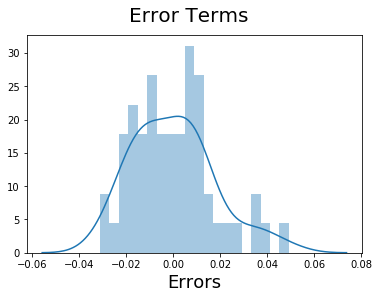

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_points), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###### Error terms are normally distributed with mean centered around 0. We now proceed with 

###### We will now proceed with making predictions on the test dataset

In [51]:
num_vars = ['Matches Played', 'Total points scored', 'Successful raids', 'Raid points', 'Super raids', 'Do-or-Die raid points', 'All-outs inflicted']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,0.333333,0.315942,0.339943,0.273731,0.130435,0.337079,0.173913
1,0.333333,0.239130,0.322946,0.284768,0.043478,0.235955,0.086957
2,0.250000,0.223188,0.209632,0.187638,0.043478,0.382022,0.239130
3,0.250000,0.321739,0.407932,0.368653,0.173913,0.056180,0.195652
4,0.166667,0.165217,0.266289,0.189845,0.086957,0.056180,0.000000


In [52]:
y_test = df_test.pop('Raid points')
X_test = df_test

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
y_pred = lm.predict(X_test_new)

In [55]:
y_pred.head()

0    0.279444
1    0.253614
2    0.154748
3    0.344264
4    0.209681
dtype: float64

In [56]:
y_pred.count()

12

Text(0, 0.5, 'y_pred')

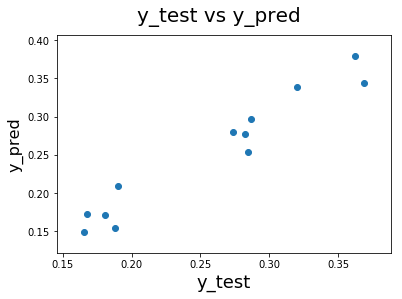

In [57]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

###### Our Final Equation will be: Raid Points = ( -0.03 + [ (0.87 * Successful raids ] + [ (0.13) * Super raids ] )

In [58]:
df_final_raid_points_prediction.head()

,Season,Team,Matches Played,Total points scored,Successful raids,Raid points,Super raids,Do-or-Die raid points,All-outs inflicted
0,Season 7,Puneri Paltan,18,578,254,308,6,60,17
1,Season 7,Tamil Thalaivas,18,525,248,313,4,51,13
2,Season 7,U.P. Yoddha,17,514,208,269,4,64,20
3,Season 7,Bengaluru Bulls,17,582,278,351,7,35,18
4,Season 7,Telugu Titans,16,474,228,270,5,35,9


In [59]:
df_final_raid_points_prediction = df_final_raid_points_prediction[['Season', 'Team', 'Successful raids', 'Super raids']]

In [60]:
df_final_raid_points_prediction.head()

,Season,Team,Successful raids,Super raids
0,Season 7,Puneri Paltan,254,6
1,Season 7,Tamil Thalaivas,248,4
2,Season 7,U.P. Yoddha,208,4
3,Season 7,Bengaluru Bulls,278,7
4,Season 7,Telugu Titans,228,5


In [61]:
df_final_raid_points_prediction['Raid Points Projected'] = round((
    -0.03 
    + (0.87 * df_final_raid_points_prediction['Successful raids']) 
    + (0.13 * df_final_raid_points_prediction['Super raids']) 
), 0)

In [62]:
df_final_raid_points_prediction['Raid Points Projected'] = df_final_raid_points_prediction['Raid Points Projected'].astype('int64')

In [63]:
df_final_raid_points_prediction = df_final_raid_points_prediction.sort_values(by = 'Raid Points Projected', ascending = False)

In [64]:
df_final_raid_points_prediction['Team'].head(1)

10    Bengal Warriors
Name: Team, dtype: object

### Final prediction: BENGAL WARRIORS will top the raid points chart.